In [1]:
!ls

Bias                           df_sentencing_full.csv
DOC Capstone idea temp.pptx    sentencing
EDA_sentencing_2.ipynb         sentencing2
Idea 1.docx                    sentencing_fips_pop2010.csv
OBTS_py                        synthatic_control_practice.Rmd
Presentation 1.docx            tableau_sentencing_temp.twb
Untitled.ipynb                 w210_syllabus.pdf
df_sentence_t.csv              ~$esentation 1.docx


# Initial Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_contrast_length(df, gender, statut, degree,target_col):
    s_1 = df[(df['statut']==statut)&\
                    (df['clfely']==degree)&\
                    (df['gender']==gender)&\
                   (df['race']=='BLACK')][target_col]

    s_2 = df[(df['statut']==statut)&\
                        (df['clfely']==degree)&\
                        (df['gender']==gender)&\
                       (df['race']=='WHITE')][target_col]
    
    fig, ax = plt.subplots(1, 1,figsize=(6,4))

    colors = ['#aacfcf', '#d291bc']

    sns.boxplot(x='series',y='values',
                data=pd.DataFrame({'values':pd.concat([s_1,s_2],axis=0),
                                  'series':np.repeat(["Black","White"],[len(s_1),len(s_2)])}),
                ax = ax,palette=colors,width=0.5
               )

In [3]:
df = pd.read_csv("sentencing_fips_pop2010.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(50)

,Unnamed: 0,fstnm,lstnm,age,race,gender,county,totpts,judge,clfely,...,prflst2,prfely2,prflst3,prfely3,prflst4,prfely4,sentdte,fips,state,pop_2010
0,0,TERRANCE,MORGAN,29,BLACK,MALE,miami-dade,113.0,SOTO,3RD DEGREE,...,794.011(4)(B),1ST DEGREE,NaN,NaN,NaN,NaN,2009-10-30,12086,FL,"2,496,435"
1,1,MACK,WILLIAMS,48,BLACK,MALE,duval,98.0,MERRETT,3RD DEGREE,...,800.04(4)(A),2ND DEGREE,NaN,NaN,NaN,NaN,2007-12-05,12031,FL,"864,263"
2,2,EUGENE,MANSO,28,BLACK,MALE,osceola,64.0,LAUTEN,3RD DEGREE,...,794.011(5),2ND DEGREE,NaN,NaN,NaN,NaN,2005-10-05,12097,FL,"268,685"
3,3,JOHNNY,FELICIANO,64,WHITE,MALE,palm beach,74.0,MILLER,3RD DEGREE,...,847.0137(2),3RD DEGREE,NaN,NaN,NaN,NaN,2011-02-17,12099,FL,"1,320,134"
4,4,ROBERT,KING,25,WHITE,MALE,hillsborough,207.1,"POMPONIO,D",1ST DEGREE,...,812.13(2)(A),1ST DEGREE,NaN,NaN,NaN,NaN,2009-01-07,12057,FL,"1,229,226"
5,5,MICHAEL,DOVER,36,WHITE,MALE,madison,600.6,"JOHNSON,LEANDRA",1ST/LIFE,...,810.02(2)(B),1ST/LIFE,787.02(2),2ND DEGREE,NaN,NaN,2007-05-07,12079,FL,"19,224"
6,6,RYAN,DOUGHERTY,24,WHITE,MALE,pasco,465.5,"SIRACUSA, P.",1ST/LIFE,...,812.13(2)(A),1ST/LIFE,NaN,NaN,NaN,NaN,2014-07-25,12101,FL,"464,697"
7,7,DOMINIQUE,GAMBLE,19,BLACK,MALE,pinellas,65.4,LUCE,2ND DEGREE,...,812.13(2)(A),1ST DEGREE,NaN,NaN,NaN,NaN,2007-05-08,12103,FL,"916,542"
8,8,LAZARO,PEREZ,25,WHITE,MALE,miami-dade,64.8,FREEMAN,3RD DEGREE,...,782.04(1),1ST DEGREE,812.014(2)(C)6,3RD DEGREE,NaN,NaN,2006-09-21,12086,FL,"2,496,435"
9,9,JEFFERY,COOPER,46,WHITE,MALE,miami-dade,172.8,BUTCHKO,2ND DEGREE,...,"810.02(3)(A,B,D",1ST DEGREE,812.014(2)(C)1,3RD DEGREE,812.13(2)(A),1ST/LIFE,2009-02-04,12086,FL,"2,496,435"


In [5]:
df.columns

Index(['Unnamed: 0', 'fstnm', 'lstnm', 'age', 'race', 'gender', 'county',
       'totpts', 'judge', 'clfely', 'statut', 'offlvl', 'offdte',
       'sp_total_days', 'enhanc', 'haboff', 'habvio', 'life', 'vcc', 'prrpact',
       'dornum', 'prflst1', 'prfely1', 'prflst2', 'prfely2', 'prflst3',
       'prfely3', 'prflst4', 'prfely4', 'sentdte', 'fips', 'state',
       'pop_2010'],
      dtype='object')

In [6]:
df['clfely'].value_counts()

3RD DEGREE    971915
2ND DEGREE    297965
1ST DEGREE     57999
1ST/LIFE       22153
LIFE            4300
UNKNOWN           67
Name: clfely, dtype: int64

In [7]:
df[df['statut'].str.match('893.*')== True]['statut'].head()

7     893.13(1)(A)1
24              893
29    893.13(1)(A)1
31    893.13(1)(A)1
45     893.13(6)(A)
Name: statut, dtype: object

In [8]:
df_drug = df[df['statut'].str.match('893.*')== True]

In [9]:
df_drug['county'].value_counts()

pinellas         44992
broward          41771
hillsborough     37448
miami-dade       35163
orange           24806
                 ...  
gilchrist          182
jefferson          176
glades             138
lafayette          115
00-interstate        1
Name: county, Length: 68, dtype: int64

In [10]:
df_drug['statut'].value_counts().head(10)

893.13(6)(A)       246302
893.13(1)(A)1       66850
893.13(1)(A)2       25784
893.13              20674
893.13(7)(A)9        9248
893.13(2)(A)1        7767
893.135(1)(B)1A      4679
893.135(1)(C)1A      4663
893.13(1)(E)1        3917
893.13(1)(C)1        2935
Name: statut, dtype: int64

In [11]:
df_drug[(df_drug['statut']=='893.13(6)(A)')&(df_drug['clfely']=='3RD DEGREE')]

,Unnamed: 0,fstnm,lstnm,age,race,gender,county,totpts,judge,clfely,...,prflst2,prfely2,prflst3,prfely3,prflst4,prfely4,sentdte,fips,state,pop_2010
45,45,TIMOTHY,DOUGLAS,31,WHITE,MALE,highlands,135.6,ESTRADA,3RD DEGREE,...,810.02(2)(B),1ST/LIFE,"810.02(3)(A,B,D",2ND DEGREE,810.02(4),3RD DEGREE,2009-06-15,12055,FL,"98,786"
78,78,CHRISTOPHER,DOYLE,20,WHITE,MALE,pasco,40.0,ANDREWS,3RD DEGREE,...,810.02(2)(A),1ST DEGREE,316.193,MISDEMEANOR,316.192,MISDEMEANOR,2004-03-22,12101,FL,"464,697"
92,92,CHRISTOPHER,BROWN,25,BLACK,MALE,broward,40.3,HAIMES,3RD DEGREE,...,893.13(6)(A),3RD DEGREE,"810.02(3)(A,B,D",2ND DEGREE,893.13(1)(A)1,2ND DEGREE,2012-05-17,12011,FL,"1,748,066"
104,104,NICKCALLIE,MCINTYRE,31,BLACK,MALE,broward,30.1,LEVENSON,3RD DEGREE,...,893.135(1)(B)1B,1ST DEGREE,790.23,2ND DEGREE,893.13(1)(A)2,3RD DEGREE,2008-04-09,12011,FL,"1,748,066"
130,130,ANGELA,BRADLEY,49,BLACK,FEMALE,broward,55.2,IMPERATO,3RD DEGREE,...,812.13(2)(A),1ST/LIFE,MISDEMEANOR,MISDEMEANOR,NaN,NaN,2011-07-22,12011,FL,"1,748,066"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354364,1354364,RONALD,SCOTT,56,BLACK,MALE,broward,85.8,DESTRY,3RD DEGREE,...,782.04(2),1ST/LIFE,784.045(1)(A)2,2ND DEGREE,790.23(3),2ND DEGREE,2014-02-14,12011,FL,"1,748,066"
1354367,1354367,JAHAZA,KIMBELL,28,WHITE,FEMALE,hillsborough,68.5,"FERNANDEZ,K",3RD DEGREE,...,812.135(2)(B),1ST DEGREE,893.13(6)(A),3RD DEGREE,322.34(5),3RD DEGREE,2010-07-15,12057,FL,"1,229,226"
1354379,1354379,CALVIN,POWELL,40,BLACK,MALE,duval,89.1,HEALEY,3RD DEGREE,...,782.04(2),1ST/LIFE,812.13(2)(C),2ND DEGREE,810.02(4),3RD DEGREE,2014-12-15,12031,FL,"864,263"
1354386,1354386,ZACHARY,MICKENS,46,BLACK,MALE,miami-dade,146.6,THOMAS,3RD DEGREE,...,782.04(2),1ST/LIFE,812.13(2)(A),1ST/LIFE,800.04(4)(A),2ND DEGREE,2012-07-30,12086,FL,"2,496,435"


# Sample visual

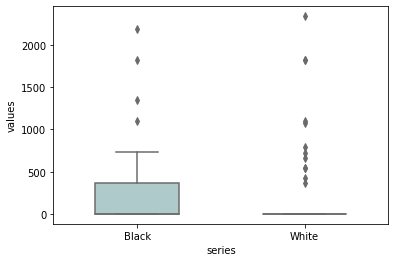

In [12]:
get_contrast_length(df = df_drug, 
            gender = 'MALE',
            statut = '893.13(6)(A)',
            degree = '1ST DEGREE',
            target_col = "sp_total_days")

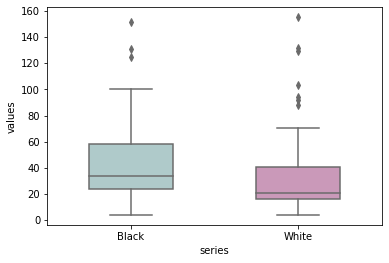

In [13]:
get_contrast_length(df = df_drug, 
            gender = 'MALE',
            statut = '893.13(6)(A)',
            degree = '1ST DEGREE',
            target_col = "totpts")

# Checking for imbalance

In [14]:
df_drug.shape

(440656, 33)

In [15]:
df_drug[(df_drug['county']=='pinellas')& (df_drug['clfely']=='1ST DEGREE')].race.value_counts()

WHITE    763
BLACK    566
OTHER     29
Name: race, dtype: int64

In [16]:
df_drug[(df_drug['county']=='pinellas')& (df_drug['clfely']=='2ND DEGREE')].race.value_counts()

WHITE    4681
BLACK    4518
OTHER      70
Name: race, dtype: int64

In [17]:
df_drug[(df_drug['county']=='pinellas')& (df_drug['clfely']=='3RD DEGREE')].race.value_counts()

WHITE    23047
BLACK    10954
OTHER      353
Name: race, dtype: int64

# visualize sample disparity

<AxesSubplot:>

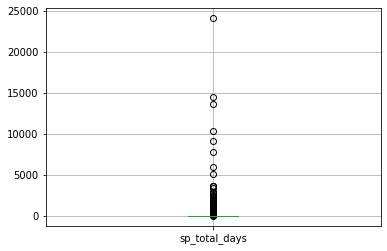

In [18]:
df_drug[(df_drug['county']=='pinellas')& (df_drug['clfely']=='3RD DEGREE')].boxplot(column=['sp_total_days'])

<AxesSubplot:>

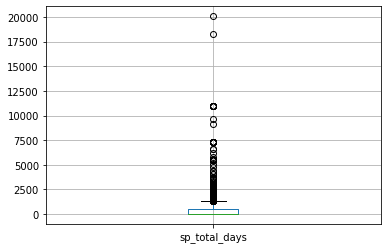

In [19]:
df_drug[(df_drug['county']=='pinellas')& (df_drug['clfely']=='2ND DEGREE')].boxplot(column=['sp_total_days'])

<AxesSubplot:>

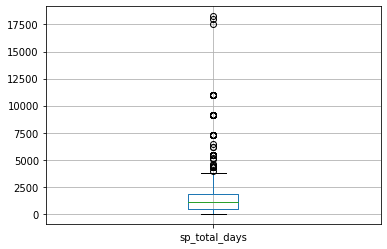

In [20]:
df_drug[(df_drug['county']=='pinellas')& (df_drug['clfely']=='1ST DEGREE')].boxplot(column=['sp_total_days'])

# Stratified Sampling

In [21]:

df_second_b = df_drug[(df_drug['county']=='pinellas')&\
                      (df_drug['clfely']=='2ND DEGREE')&\
                      (df_drug['race']=='BLACK')].sample(4000,random_state=1)

df_second_w = df_drug[(df_drug['county']=='pinellas')&\
                      (df_drug['clfely']=='2ND DEGREE')&\
                      (df_drug['race']=='WHITE')].sample(4000,random_state=1)

df_third_b = df_drug[(df_drug['county']=='pinellas')&\
                      (df_drug['clfely']=='3RD DEGREE')&\
                      (df_drug['race']=='BLACK')].sample(8000,random_state=1)

df_third_w = df_drug[(df_drug['county']=='pinellas')&\
                      (df_drug['clfely']=='3RD DEGREE')&\
                      (df_drug['race']=='WHITE')].sample(8000,random_state=1)

In [23]:
#df_drug_model.columns

In [24]:
df_drug_model = pd.concat([df_second_b,df_second_w,df_third_b,df_third_w])

In [25]:
df_drug_model.columns

Index(['Unnamed: 0', 'fstnm', 'lstnm', 'age', 'race', 'gender', 'county',
       'totpts', 'judge', 'clfely', 'statut', 'offlvl', 'offdte',
       'sp_total_days', 'enhanc', 'haboff', 'habvio', 'life', 'vcc', 'prrpact',
       'dornum', 'prflst1', 'prfely1', 'prflst2', 'prfely2', 'prflst3',
       'prfely3', 'prflst4', 'prfely4', 'sentdte', 'fips', 'state',
       'pop_2010'],
      dtype='object')

In [26]:
df_drug_model = df_drug_model.loc[:,['age','race','gender','totpts','clfely']]

In [27]:
df_drug_model.shape

(24000, 5)

In [28]:
is_NaN = df_drug_model.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_drug_model[row_has_NaN]

In [29]:
rows_with_NaN

,age,race,gender,totpts,clfely


In [45]:
#dm_gd = pd.get_dummies(df_drug_model['gender'], prefix='gender')

In [30]:
df_drug_model.head(100)

,age,race,gender,totpts,clfely
385172,41,BLACK,MALE,44.4,2ND DEGREE
559419,43,BLACK,FEMALE,35.0,2ND DEGREE
387297,28,BLACK,MALE,63.3,2ND DEGREE
1263451,21,BLACK,MALE,54.1,2ND DEGREE
85467,20,BLACK,MALE,57.0,2ND DEGREE
...,...,...,...,...,...
1348455,45,BLACK,FEMALE,77.7,2ND DEGREE
931908,40,BLACK,MALE,47.0,2ND DEGREE
553064,21,BLACK,MALE,36.8,2ND DEGREE
79494,20,BLACK,MALE,34.8,2ND DEGREE


# Categorical Encoding

In [31]:
df_drug_model['gender_ind'] = [1 if x=='MALE' else 0 for x in df_drug_model['gender']]
df_drug_model['outcome_degree'] = [1 if x=='2ND DEGREE' else 0 for x in df_drug_model['clfely']]

In [32]:
df_drug_model.head()

,age,race,gender,totpts,clfely,gender_ind,outcome_degree
385172,41,BLACK,MALE,44.4,2ND DEGREE,1,1
559419,43,BLACK,FEMALE,35.0,2ND DEGREE,0,1
387297,28,BLACK,MALE,63.3,2ND DEGREE,1,1
1263451,21,BLACK,MALE,54.1,2ND DEGREE,1,1
85467,20,BLACK,MALE,57.0,2ND DEGREE,1,1


In [33]:
X = df_drug_model.loc[:,['age','gender_ind','totpts']]
y = df_drug_model['outcome_degree']

# Train Test split and Baseline Modeling

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [46]:
X

,age,gender_ind,totpts
385172,41,1,44.4
559419,43,0,35.0
387297,28,1,63.3
1263451,21,1,54.1
85467,20,1,57.0
...,...,...,...
1022789,33,0,62.2
416625,42,1,21.4
1262450,60,1,35.5
1112467,31,0,16.6


In [35]:
# SciKit Learn Imports
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [36]:
#!pip install --upgrade scikit-learn

In [38]:
model_nb = GaussianNB(var_smoothing=1e-8)
model_nb.fit(X_train, y_train)
dev_pred = model_nb.predict(X_test)
print('Multinomial NB Accuracy %.3f' %metrics.accuracy_score(y_test, dev_pred))
print('Multinomial NB Precision %.3f' %metrics.precision_score(y_test, dev_pred))
print('Multinomial NB Recall %.3f' %metrics.recall_score(y_test, dev_pred))

Multinomial NB Accuracy 0.750
Multinomial NB Precision 0.739
Multinomial NB Recall 0.409


In [39]:
model_rfc = RandomForestClassifier(n_estimators=500,random_state=7)
model_rfc.fit(X_train, y_train)
dev_pred = model_rfc.predict(X_test)
print('Random Forest Accuracy %.3f' %metrics.accuracy_score(y_test, dev_pred))
print('Random Forest Precision %.3f' %metrics.precision_score(y_test, dev_pred))
print('Random Forest Recall %.3f' %metrics.recall_score(y_test, dev_pred))

Random Forest Accuracy 0.759
Random Forest Precision 0.648
Random Forest Recall 0.637


In [40]:
# Take long time to run 15 min ~

model_svm = SVC(C=1e5)
model_svm.fit(X_train, y_train)
dev_pred = model_svm.predict(X_test)
print('SVM Accuracy %.3f' %metrics.accuracy_score(y_test, dev_pred))
print('SVM Precision %.3f' %metrics.precision_score(y_test, dev_pred))
print('SVM Recall %.3f' %metrics.recall_score(y_test, dev_pred))

SVM Accuracy 0.787
SVM Precision 0.693
SVM Recall 0.666


In [48]:
model_rfc.classes_

array([0, 1])

# Propensity generation

In [51]:
 df_drug_model['propensity'] = model_rfc.predict_proba(X)[:,1]

In [52]:
df_drug_model.head()

,age,race,gender,totpts,clfely,gender_ind,outcome_degree,propensity
385172,41,BLACK,MALE,44.4,2ND DEGREE,1,1,0.895933
559419,43,BLACK,FEMALE,35.0,2ND DEGREE,0,1,0.839300
387297,28,BLACK,MALE,63.3,2ND DEGREE,1,1,0.878867
1263451,21,BLACK,MALE,54.1,2ND DEGREE,1,1,0.930000
85467,20,BLACK,MALE,57.0,2ND DEGREE,1,1,0.994000


# Propensity Matching

In [53]:
treated = df_drug_model[df_drug_model["race"]=="BLACK"].sample(2000)
treated = treated.reset_index(drop=True)
treated.head()

,age,race,gender,totpts,clfely,gender_ind,outcome_degree,propensity
0,19,BLACK,MALE,16.5,3RD DEGREE,1,0,0.000000
1,21,BLACK,FEMALE,16.6,3RD DEGREE,0,0,0.000000
2,55,BLACK,MALE,31.4,3RD DEGREE,1,0,0.012667
3,38,BLACK,MALE,25.0,3RD DEGREE,1,0,0.000000
4,27,BLACK,FEMALE,106.6,2ND DEGREE,0,1,0.986000


In [54]:
untreated = df_drug_model[df_drug_model["race"]=='WHITE']
matched_control = []
def add_matched_control(patient):
    control_patient =untreated[(untreated["propensity"]>=patient["propensity"]-0.015 )& (untreated["propensity"]<=patient["propensity"]+0.015 )].sample().iloc[0]
    matched_control.append(control_patient)
    
treated.apply(add_matched_control, axis=1)
matched_control_df = pd.DataFrame(matched_control).reset_index(drop=True)
matched_control_df

,age,race,gender,totpts,clfely,gender_ind,outcome_degree,propensity
0,27,WHITE,MALE,18.0,3RD DEGREE,1,0,0.000000
1,24,WHITE,FEMALE,16.0,3RD DEGREE,0,0,0.000000
2,45,WHITE,MALE,27.1,3RD DEGREE,1,0,0.000000
3,25,WHITE,MALE,26.8,3RD DEGREE,1,0,0.000000
4,28,WHITE,MALE,72.4,2ND DEGREE,1,1,1.000000
...,...,...,...,...,...,...,...,...
1995,28,WHITE,FEMALE,32.5,3RD DEGREE,0,0,0.083733
1996,50,WHITE,FEMALE,34.8,3RD DEGREE,0,0,0.233000
1997,21,WHITE,FEMALE,40.0,2ND DEGREE,0,1,0.873000
1998,47,WHITE,FEMALE,37.6,3RD DEGREE,0,0,0.219000


In [55]:
paired_sample = treated.join(matched_control_df, rsuffix="_control")
paired_sample

,age,race,gender,totpts,clfely,gender_ind,outcome_degree,propensity,age_control,race_control,gender_control,totpts_control,clfely_control,gender_ind_control,outcome_degree_control,propensity_control
0,19,BLACK,MALE,16.5,3RD DEGREE,1,0,0.000000,27,WHITE,MALE,18.0,3RD DEGREE,1,0,0.000000
1,21,BLACK,FEMALE,16.6,3RD DEGREE,0,0,0.000000,24,WHITE,FEMALE,16.0,3RD DEGREE,0,0,0.000000
2,55,BLACK,MALE,31.4,3RD DEGREE,1,0,0.012667,45,WHITE,MALE,27.1,3RD DEGREE,1,0,0.000000
3,38,BLACK,MALE,25.0,3RD DEGREE,1,0,0.000000,25,WHITE,MALE,26.8,3RD DEGREE,1,0,0.000000
4,27,BLACK,FEMALE,106.6,2ND DEGREE,0,1,0.986000,28,WHITE,MALE,72.4,2ND DEGREE,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,36,BLACK,FEMALE,30.3,3RD DEGREE,0,0,0.088000,28,WHITE,FEMALE,32.5,3RD DEGREE,0,0,0.083733
1996,41,BLACK,MALE,60.6,3RD DEGREE,1,0,0.248000,50,WHITE,FEMALE,34.8,3RD DEGREE,0,0,0.233000
1997,18,BLACK,MALE,41.2,2ND DEGREE,1,1,0.870733,21,WHITE,FEMALE,40.0,2ND DEGREE,0,1,0.873000
1998,53,BLACK,MALE,76.3,3RD DEGREE,1,0,0.218000,47,WHITE,FEMALE,37.6,3RD DEGREE,0,0,0.219000


# Treatment Effect estimation

In [57]:
ATE = (paired_sample["outcome_degree"]-paired_sample["outcome_degree_control"]).mean()
ATE

-0.0425

In [67]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest,confint_proportions_2indep

In [61]:
sum(paired_sample['outcome_degree'])

666

In [62]:
sum(paired_sample['outcome_degree_control'])

751

In [64]:
count = np.array([666, 751])
nobs = np.array([2000, 2000])
stat, pval = proportions_ztest(count, nobs,alternative='two-sided')
print('{0:0.3f}'.format(pval))

0.005


In [66]:
proportions_ztest(count, nobs,alternative='two-sided')

(-2.809970710967429, 0.004954600862683833)

In [69]:
lower, upper = confint_proportions_2indep(666, 2000, 751, 2000, method=None, compare='diff', alpha=0.05, correction=True)

In [70]:
(lower, upper)

(-0.07203931126068278, -0.012856185836273348)

In [72]:
np.mean([lower,upper])

-0.04244774854847806

In [74]:
df_drug.columns

Index(['Unnamed: 0', 'fstnm', 'lstnm', 'age', 'race', 'gender', 'county',
       'totpts', 'judge', 'clfely', 'statut', 'offlvl', 'offdte',
       'sp_total_days', 'enhanc', 'haboff', 'habvio', 'life', 'vcc', 'prrpact',
       'dornum', 'prflst1', 'prfely1', 'prflst2', 'prfely2', 'prflst3',
       'prfely3', 'prflst4', 'prfely4', 'sentdte', 'fips', 'state',
       'pop_2010'],
      dtype='object')

In [75]:
df_sentencing = pd.read_csv('df_sentencing_full.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (9,16,19,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,61,62,63,65,66,67,71,72,73,75,76,77,88,89,90,91,94,95,96,97,98,99,100,103,104,105,106,107,108,109,112,113,114,115,116,117,118,121,122,123,124,125,126,127,130,131,132,133,134,135,136,139,140,141,142,143,144,145,148,149,150,151,152,153,154,157,158,159,160,161,162,163,166,167,168,169,170,171,172,175,176,177,178,179,180,183,184,185,186,187,188,191,192,193,194,195,196,199,200,201,202,203,204,207,208,209,210,211,212,215,216,217,218,219,220,223,224,225,226,227,228,231,232,233,234,235,236,239,240,241,242,243,244,247,248,249,250,251,252,255,256,257,266,271,274,275,278) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
list(df_sentencing.columns)

['sentdte',
 'dornum',
 'prepby',
 'prepnm',
 'county',
 'judge',
 'lstnm',
 'fstnm',
 'dob',
 'obts',
 'race',
 'hispan',
 'gender',
 'dispos',
 'revoke',
 'offqlf',
 'docket',
 'clfely',
 'statut',
 'prioff',
 'offlvl',
 'offdte',
 'profpt',
 'aosupt',
 'aotopt',
 'aotopw',
 'vi2mrd',
 'vi2mrp',
 'vidth',
 'vidthp',
 'visvr',
 'visvrp',
 'vimod',
 'vimodp',
 'vislgh',
 'vislgp',
 'visexp',
 'visxpp',
 'visexc',
 'visxcp',
 'vitopt',
 'prsupt',
 'prtopt',
 'pgsubt',
 'p1subt',
 'lsviol',
 'rpviol',
 'faviol',
 'weapon',
 'subtpt',
 'enhanc',
 'ensubt',
 'totpts',
 'totpt2',
 'incpts',
 'total',
 'spmnth',
 'spmnt2',
 'spmnt3',
 'spmnt4',
 'spimp',
 'spyrs',
 'spmths',
 'spdays',
 'cjimp',
 'cjyrs',
 'cjmths',
 'cjdays',
 'timsrv',
 'otimp',
 'ccimp',
 'ccyrs',
 'ccmths',
 'ccdays',
 'primp',
 'pryrs',
 'prmths',
 'prdays',
 'haboff',
 'habvio',
 'aggdep',
 'mitdep',
 'amrsn1',
 'amrsn2',
 'amrsn3',
 'famand',
 'dtmand',
 'dtmnd2',
 'aodckt1',
 'aofely1',
 'aoflst1',
 'aoofcd1',
 'aosv

In [78]:
needed_col = ['sentdte','county','race','gender','dispos','statut'
              ,'vi2mrd','vi2mrp','vidth','vidthp','visvr','visvrp','vimod','vislgh','vislgp','visexp'
             ,'visxpp','lsviol','rpviol','faviol','weapon','totpts','enhanc','clfely']

In [90]:
df_sentence_model = df_sentencing.loc[:,needed_col]

In [91]:
df_sentence_model = df_sentence_model[df_sentence_model['statut'].str.match('893.*')== True]

In [92]:
df_sentence_model =df_sentence_model[(df_sentence_model['clfely']=='3RD DEGREE')|(df_sentence_model['clfely']=='2ND DEGREE')]

In [93]:
df_sentence_model = df_sentence_model[df_sentence_model['race'] != 'OTHER']

In [95]:
df_sentence_model = df_sentence_model[df_sentence_model['county']=='PINELLAS']

In [96]:
df_sentence_model.shape

(43200, 24)

In [97]:
df_sentence_model['sent_year']=df_sentence_model["sentdte"].str[-4:]

In [98]:
df_sentence_model['dispos'] = [0 if x =='PLEA' else 1 for x in df_sentence_model['dispos'] ]
df_sentence_model['enhanc'] = [0 if x =='NONE' else 1 for x in df_sentence_model['enhanc'] ]

In [100]:
col_ind_l = ['vi2mrd','vi2mrp','vidth','vidthp','visvr','visvrp','vimod','vislgh','vislgp','visexp'
             ,'visxpp','lsviol','rpviol','faviol','weapon']

In [102]:
for i in col_ind_l:
    df_sentence_model[i]  = [0 if x ==0 else 1 for x in df_sentence_model[i] ]

In [104]:
df_sentence_model['gender_ind'] = [0 if x =='MALE' else 1 for x in df_sentence_model['gender'] ]

In [105]:

df_second_b = df_sentence_model[(df_sentence_model['county']=='PINELLAS')&\
                      (df_sentence_model['clfely']=='2ND DEGREE')&\
                      (df_sentence_model['race']=='BLACK')].sample(4000,random_state=1)

df_second_w = df_sentence_model[(df_sentence_model['county']=='PINELLAS')&\
                      (df_sentence_model['clfely']=='2ND DEGREE')&\
                      (df_sentence_model['race']=='WHITE')].sample(4000,random_state=1)

df_third_b = df_sentence_model[(df_sentence_model['county']=='PINELLAS')&\
                      (df_sentence_model['clfely']=='3RD DEGREE')&\
                      (df_sentence_model['race']=='BLACK')].sample(8000,random_state=1)

df_third_w = df_sentence_model[(df_sentence_model['county']=='PINELLAS')&\
                      (df_sentence_model['clfely']=='3RD DEGREE')&\
                      (df_sentence_model['race']=='WHITE')].sample(8000,random_state=1)

In [106]:
df_sentence_model_2 = pd.concat([df_second_b,df_second_w,df_third_b,df_third_w])

In [109]:
df_sentence_model_2.head()

,sentdte,county,race,gender,dispos,statut,vi2mrd,vi2mrp,vidth,vidthp,...,lsviol,rpviol,faviol,weapon,totpts,enhanc,clfely,sent_year,gender_ind,outcome_degree
385172,01OCT2007,PINELLAS,BLACK,MALE,0,893.13(1)(A)1,0,0,0,0,...,0,0,0,0,44.4,0,2ND DEGREE,2007,0,1
559419,24MAR2008,PINELLAS,BLACK,FEMALE,0,893.13(1)(A)1,0,0,0,0,...,0,0,0,0,35.0,0,2ND DEGREE,2008,1,1
387297,03MAY2007,PINELLAS,BLACK,MALE,0,893.13(1)(A)1,0,0,0,0,...,0,0,0,0,63.3,0,2ND DEGREE,2007,0,1
1263452,03AUG2012,PINELLAS,BLACK,MALE,0,893.13(1)(A)1,0,0,0,0,...,0,0,0,0,54.1,0,2ND DEGREE,2012,0,1
85467,20JUN2011,PINELLAS,BLACK,MALE,0,893.13(1)(A)1,0,0,0,0,...,1,1,0,0,57.0,0,2ND DEGREE,2011,0,1


In [108]:
df_sentence_model_2['outcome_degree'] = [1 if x=='2ND DEGREE' else 0 for x in df_sentence_model_2['clfely']]

In [110]:
df_sentence_model_2['sent_year'] = pd.to_numeric(df_sentence_model_2['sent_year'])

In [111]:
X = df_sentence_model_2.loc[:,['vi2mrd','vi2mrp','vidth','vidthp','visvr','visvrp','vimod','vislgh','vislgp','visexp'
             ,'visxpp','lsviol','rpviol','faviol','weapon','sent_year','dispos','gender_ind','enhanc','totpts']]
y = df_sentence_model_2['outcome_degree']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [115]:
model_rfc = RandomForestClassifier(n_estimators=500,random_state=7)
model_rfc.fit(X_train, y_train)
dev_pred = model_rfc.predict(X_test)
print('Random Forest Accuracy %.3f' %metrics.accuracy_score(y_test, dev_pred))
print('Random Forest Precision %.3f' %metrics.precision_score(y_test, dev_pred))
print('Random Forest Recall %.3f' %metrics.recall_score(y_test, dev_pred))

Random Forest Accuracy 0.772
Random Forest Precision 0.662
Random Forest Recall 0.668


In [119]:
X

,vi2mrd,vi2mrp,vidth,vidthp,visvr,visvrp,vimod,vislgh,vislgp,visexp,visxpp,lsviol,rpviol,faviol,weapon,sent_year,dispos,gender_ind,enhanc,totpts
385172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0,0,0,44.4
559419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,0,1,0,35.0
387297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0,0,0,63.3
1263452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,0,0,0,54.1
85467,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2011,0,0,0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0,1,0,62.2
416625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,0,0,0,21.4
1262451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,0,0,0,35.5
1112467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011,0,1,0,16.6


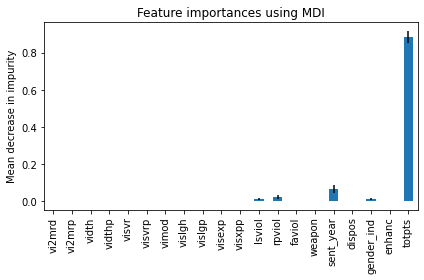

In [120]:
feature_names = [x for x in X.columns]
importances = model_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rfc.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [123]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#pprint(random_grid)


In [124]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [125]:
dev_pred = rf_random.predict(X_test)
print('Random Forest Accuracy %.3f' %metrics.accuracy_score(y_test, dev_pred))
print('Random Forest Precision %.3f' %metrics.precision_score(y_test, dev_pred))
print('Random Forest Recall %.3f' %metrics.recall_score(y_test, dev_pred))

Random Forest Accuracy 0.804
Random Forest Precision 0.678
Random Forest Recall 0.804
